# Casos Covid19
El objetivo de este analisis es aprender a manejar algunos conceptos con series de tiempo y llegar a graficar casos positivos, negativos y sospechosos de la base de datos que publica el Gobierno de la Ciudad de Buenos Aires en su portal: https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/casos-covid-19/casos_covid19.xlsx
La idea es que se pueda actualizar el CSV sin tener que modificar el notebook para poder viualizar los datos actualizados

In [1]:
import pandas as pd
csv = pd.read_excel('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/salud/casos-covid-19/casos_covid19.xlsx')
data=pd.DataFrame(csv)
data.head()
covid = data
#data = covid

In [2]:
data = pd.get_dummies (data, columns = ['fallecido'])


In [3]:
data.head()

,numero_de_caso,fecha_apertura_snvs,fecha_toma_muestra,fecha_clasificacion,provincia,barrio,comuna,genero,edad,clasificacion,fecha_fallecimiento,fecha_alta,tipo_contagio,fallecido_si
0,1636805,2020-08-02,2020-08-02,2020-08-02,CABA,SAN CRISTOBAL,3.0,masculino,61.0,confirmado,NaT,2020-08-10,En Investigación,0
1,1637030,2020-08-02,2020-08-02,2020-08-02,Buenos Aires,NaN,NaN,masculino,93.0,confirmado,NaT,2020-08-10,Contacto,0
2,1637247,2020-08-02,2020-08-01,2020-08-02,CABA,VILLA LUGANO,8.0,femenino,22.0,confirmado,NaT,2020-08-10,Comunitario,0
3,1637305,2020-08-02,2020-08-02,2020-08-02,CABA,ALMAGRO,5.0,femenino,1.0,confirmado,NaT,2020-08-10,Contacto,0
4,1637509,2020-08-02,2020-08-01,2020-08-01,CABA,PALERMO,14.0,masculino,24.0,confirmado,NaT,2020-08-10,Contacto,0


### Dejamos solo lo de CABA y vemos los nulos

In [4]:
data=data.loc[ (data['provincia'] == 'CABA')]

In [5]:
print("\nNombre de las columnas y valores faltantes por columna: \n\n" )
data.isnull().sum()


Nombre de las columnas y valores faltantes por columna: 




numero_de_caso              0
fecha_apertura_snvs         0
fecha_toma_muestra       1861
fecha_clasificacion         0
provincia                   0
barrio                  14512
comuna                  14512
genero                      0
edad                      300
clasificacion               0
fecha_fallecimiento    436015
fecha_alta             389534
tipo_contagio          289261
fallecido_si                0
dtype: int64

### Quitamos las columnas de fallecido y fecha_fallecimiento por la cantidad de valores nulos
Además el objeto de este análisis es identificar la tendencia de positividad respecto de tests realizados

In [6]:
data=pd.DataFrame(data,columns=['fecha_toma_muestra','genero','edad','clasificacion','fallecido_si'])

In [7]:
data.isnull().sum()

fecha_toma_muestra    1861
genero                   0
edad                   300
clasificacion            0
fallecido_si             0
dtype: int64

### Convertimos fecha_toma_muestra a un formato fecha con la funcion de pandas : to_datetime

In [8]:
data['fecha_toma_muestra'] = pd.to_datetime(data['fecha_toma_muestra'])
data.dtypes

fecha_toma_muestra    datetime64[ns]
genero                        object
edad                         float64
clasificacion                 object
fallecido_si                   uint8
dtype: object

### Eliminamos los registros anteriores al 11 de marzo de 2020 ya que es la fecha en que la ORGANIZACIÓN MUNDIAL DE LA SALUD (OMS), declaró el brote del nuevo coronavirus como una pandemia

In [9]:
data.fecha_toma_muestra = data.loc[ (data['fecha_toma_muestra'] >= '2020-03-11' )]

### Convertimos las categóricas a Dummies para poder contabilizar y agrupar luego

In [10]:
data = pd.get_dummies (data, columns = ['genero','clasificacion'])

In [11]:
data = pd.DataFrame(data)
data.head()

,fecha_toma_muestra,edad,fallecido_si,genero_femenino,genero_masculino,clasificacion_confirmado,clasificacion_descartado,clasificacion_sospechoso
0,2020-08-02 00:00:00,61.0,0,0,1,1,0,0
2,2020-08-01 00:00:00,22.0,0,1,0,1,0,0
3,2020-08-02 00:00:00,1.0,0,1,0,1,0,0
4,2020-08-01 00:00:00,24.0,0,0,1,1,0,0
5,2020-08-01 00:00:00,1.0,0,0,1,1,0,0


In [12]:
data.isnull().sum()

fecha_toma_muestra          2022
edad                         300
fallecido_si                   0
genero_femenino                0
genero_masculino               0
clasificacion_confirmado       0
clasificacion_descartado       0
clasificacion_sospechoso       0
dtype: int64

### Completamos los valores faltantes de edad con el promedio

In [13]:
data.edad = data.edad.fillna(data.edad.mean())

In [14]:
data.isnull().sum()

fecha_toma_muestra          2022
edad                           0
fallecido_si                   0
genero_femenino                0
genero_masculino               0
clasificacion_confirmado       0
clasificacion_descartado       0
clasificacion_sospechoso       0
dtype: int64

### Completamos valores faltantes de fecha con el valor del registro anterior

In [15]:
data.fecha_toma_muestra.fillna(method='ffill', inplace = True)

In [16]:
data.isnull().sum()

fecha_toma_muestra          0
edad                        0
fallecido_si                0
genero_femenino             0
genero_masculino            0
clasificacion_confirmado    0
clasificacion_descartado    0
clasificacion_sospechoso    0
dtype: int64

### Pasamos lo que tenemos a covid.csv ya optimizado para seguirlo trabajando luego y así optimizar el tiempo

In [17]:
data.to_csv('covid.csv',index=False)
csv = pd.read_csv('covid.csv')
data = pd.DataFrame(csv)

In [18]:
data.head()

,fecha_toma_muestra,edad,fallecido_si,genero_femenino,genero_masculino,clasificacion_confirmado,clasificacion_descartado,clasificacion_sospechoso
0,2020-08-02,61.0,0,0,1,1,0,0
1,2020-08-01,22.0,0,1,0,1,0,0
2,2020-08-02,1.0,0,1,0,1,0,0
3,2020-08-01,24.0,0,0,1,1,0,0
4,2020-08-01,1.0,0,0,1,1,0,0


### Eliminamos la columna edad ya que ahora no la usaremos

In [19]:
#data.drop(columns = ['edad'], inplace = True)

In [20]:
data.head()

,fecha_toma_muestra,edad,fallecido_si,genero_femenino,genero_masculino,clasificacion_confirmado,clasificacion_descartado,clasificacion_sospechoso
0,2020-08-02,61.0,0,0,1,1,0,0
1,2020-08-01,22.0,0,1,0,1,0,0
2,2020-08-02,1.0,0,1,0,1,0,0
3,2020-08-01,24.0,0,0,1,1,0,0
4,2020-08-01,1.0,0,0,1,1,0,0


### Ponemos fecha_toma_muestra como index y nos aseguramos que este como tipo de dato timeseries

In [21]:
data.index = data['fecha_toma_muestra']
data.drop(columns = ['fecha_toma_muestra'], inplace = True)

In [22]:
data.index = pd.to_datetime(data.index)

### Generamos un nuevo feature que sea test realizados que será la suma de confirmados + descartados + sospechosos

In [23]:
data['numtests'] = data[["clasificacion_confirmado", "clasificacion_descartado", "clasificacion_sospechoso"]].sum(axis=1)

### Resampleo por día, por semana y por mes, siempre utilizando .sum
Más info en la siguiente celda oculta

Here is a list of most used <offset frequency> aliases:
'nD'           ==> n days  
'nM'           ==> n months
'nW'           ==> n weeks
'nD'           ==> n days  
'nH'           ==> n hours  
'nT' or 'nmin' ==> n mins  
'nS'           ==> n seconds
'nL' or 'nms'  ==> n milliseconds
#or mix offset together
'nD.mH'        ==> n days, m hours
Here is a list of most used <aggregation-operation> :
# Summarize
df.resample(timeinterval).sum()
# Mean
df.resample(timeinterval).mean()
# Max
df.resample(timeinterval).max()
# Min
df.resample(timeinterval).min()
# First value
df.resample(timeinterval).first()
# Last value
df.resample(timeinterval).last()
# Standard deviation
df.resample(timeinterval).std()

In [24]:
data_dia = data.resample('D').sum()
data_semana = data.resample('W').sum()
data_mes = data.resample('M').sum()

Visualizamos como queda el resample por mes:

In [25]:
data_mes.tail(4)

,edad,fallecido_si,genero_femenino,genero_masculino,clasificacion_confirmado,clasificacion_descartado,clasificacion_sospechoso,numtests
fecha_toma_muestra,,,,,,,,
2020-08-31,3.618732e+06,1478,47250,40849,37033,49728,1338,88099
2020-09-30,3.612563e+06,1073,47316,40617,29254,57381,1298,87933
2020-10-31,3.615701e+06,501,48142,40137,19385,67579,1315,88279
2020-11-30,1.254202e+06,46,16550,14372,5070,24137,1715,30922


In [26]:
data_semana.tail(4)

,edad,fallecido_si,genero_femenino,genero_masculino,clasificacion_confirmado,clasificacion_descartado,clasificacion_sospechoso,numtests
fecha_toma_muestra,,,,,,,,
2020-10-25,802790.476083,71,10721,8940,3622,15717,322,19661
2020-11-01,717097.390433,57,9646,7935,2922,14158,501,17581
2020-11-08,695177.085650,30,9246,7852,2675,13799,624,17098
2020-11-15,480837.390433,13,6240,5633,2073,8748,1052,11873


### Comenzamos a graficar

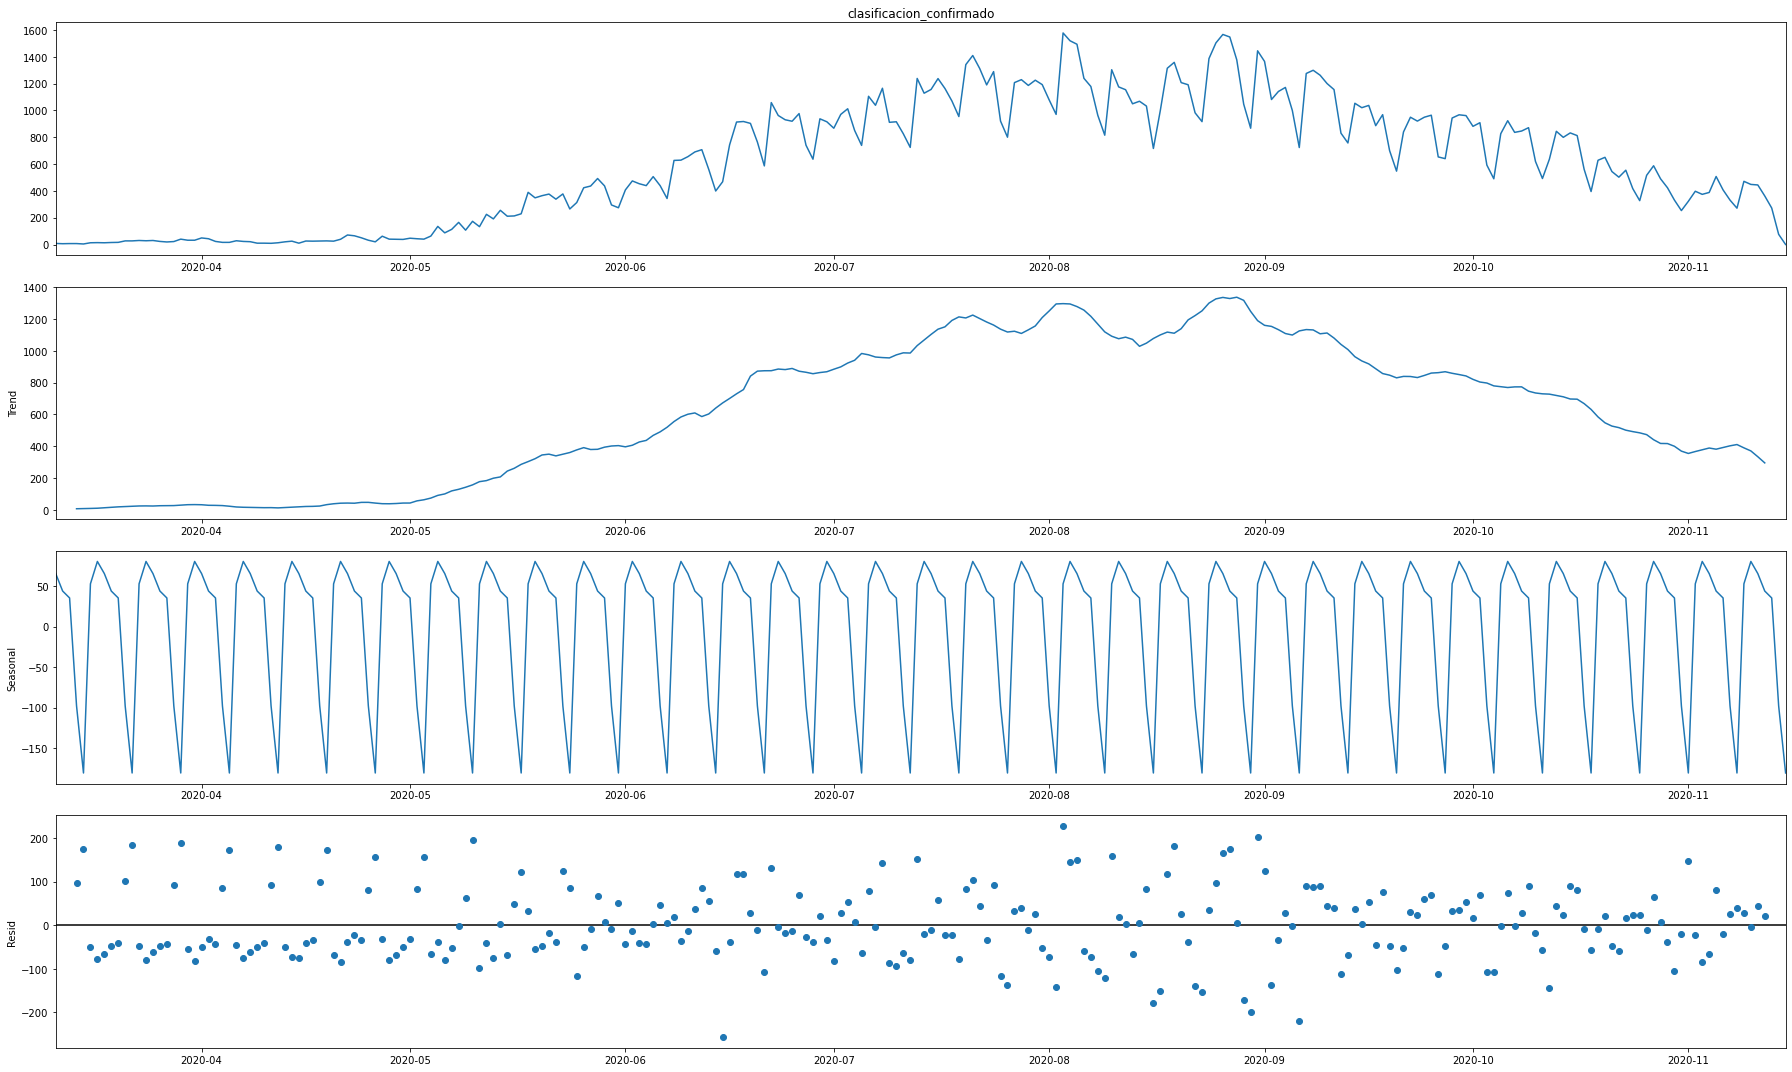

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

confirmado = seasonal_decompose(data_dia.clasificacion_confirmado, model='additive')
confirmado.trend
confirmado.seasonal

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [25,15]
confirmado.plot()
plt.show()

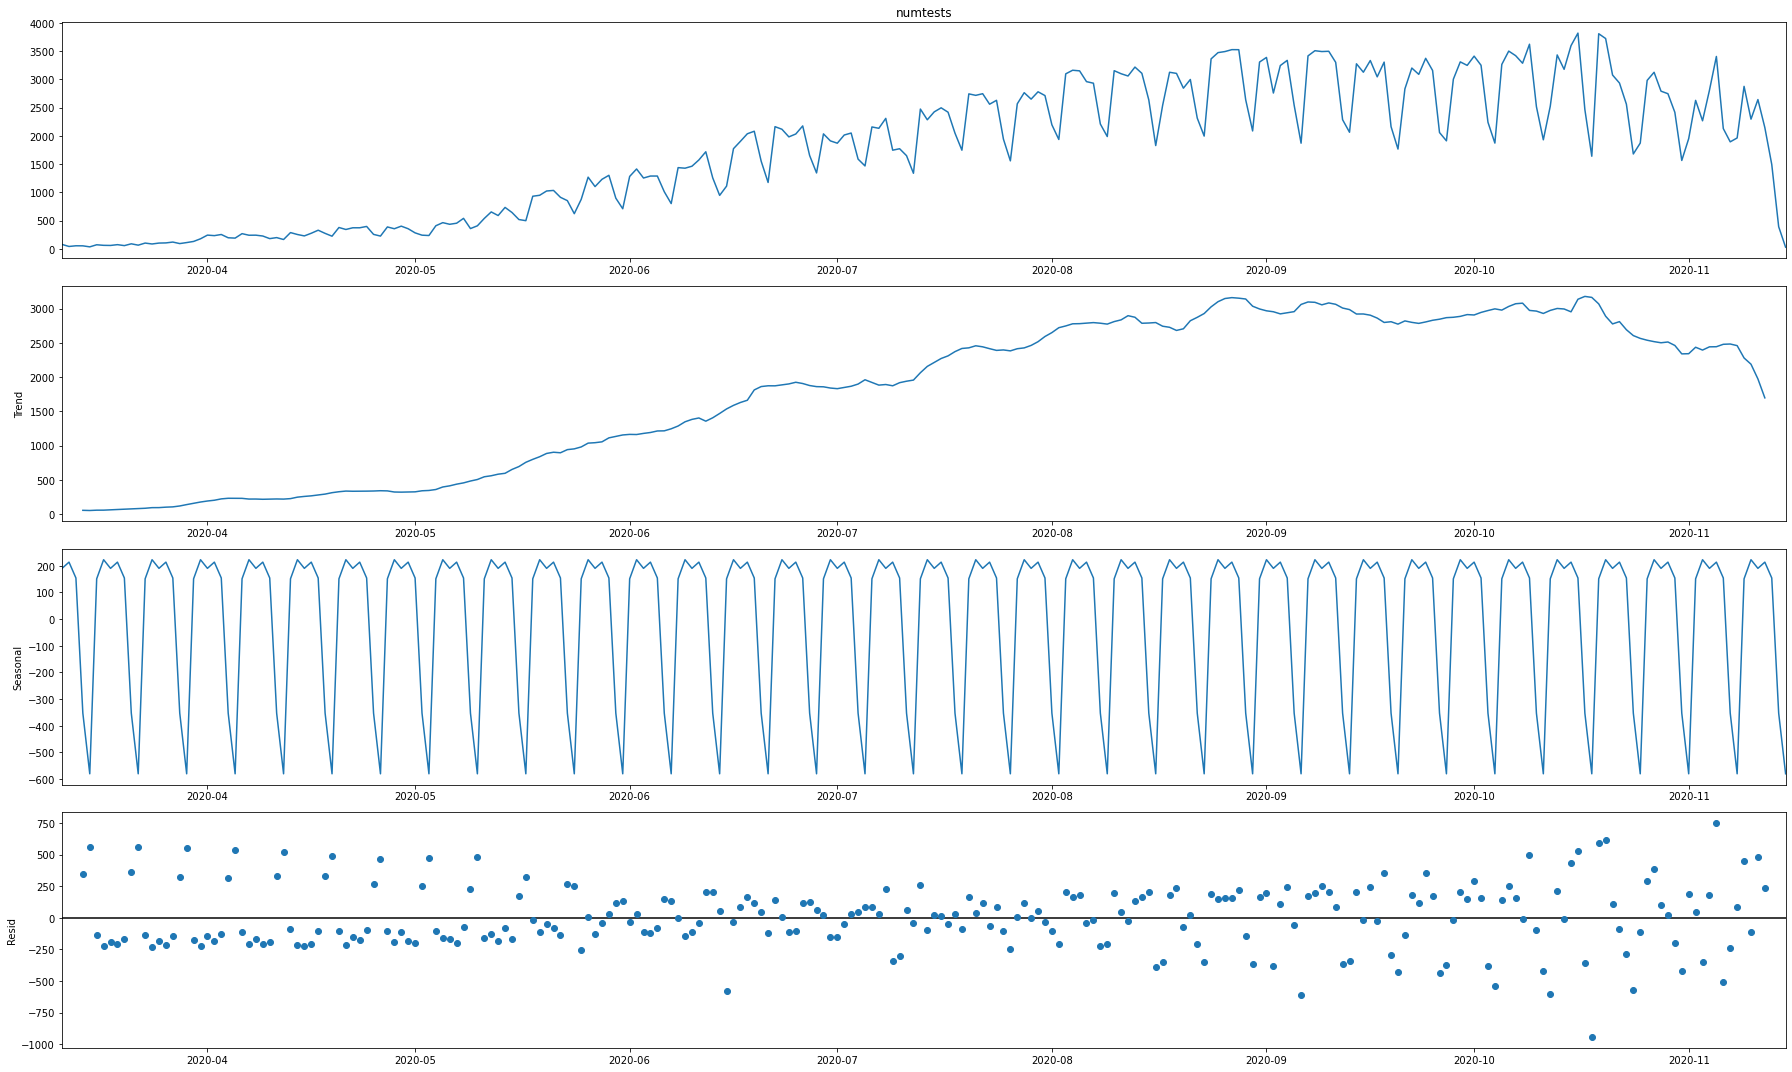

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

numtests = seasonal_decompose(data_dia.numtests, model='additive')
numtests.trend
numtests.seasonal

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [25,15]
numtests.plot()
plt.show()

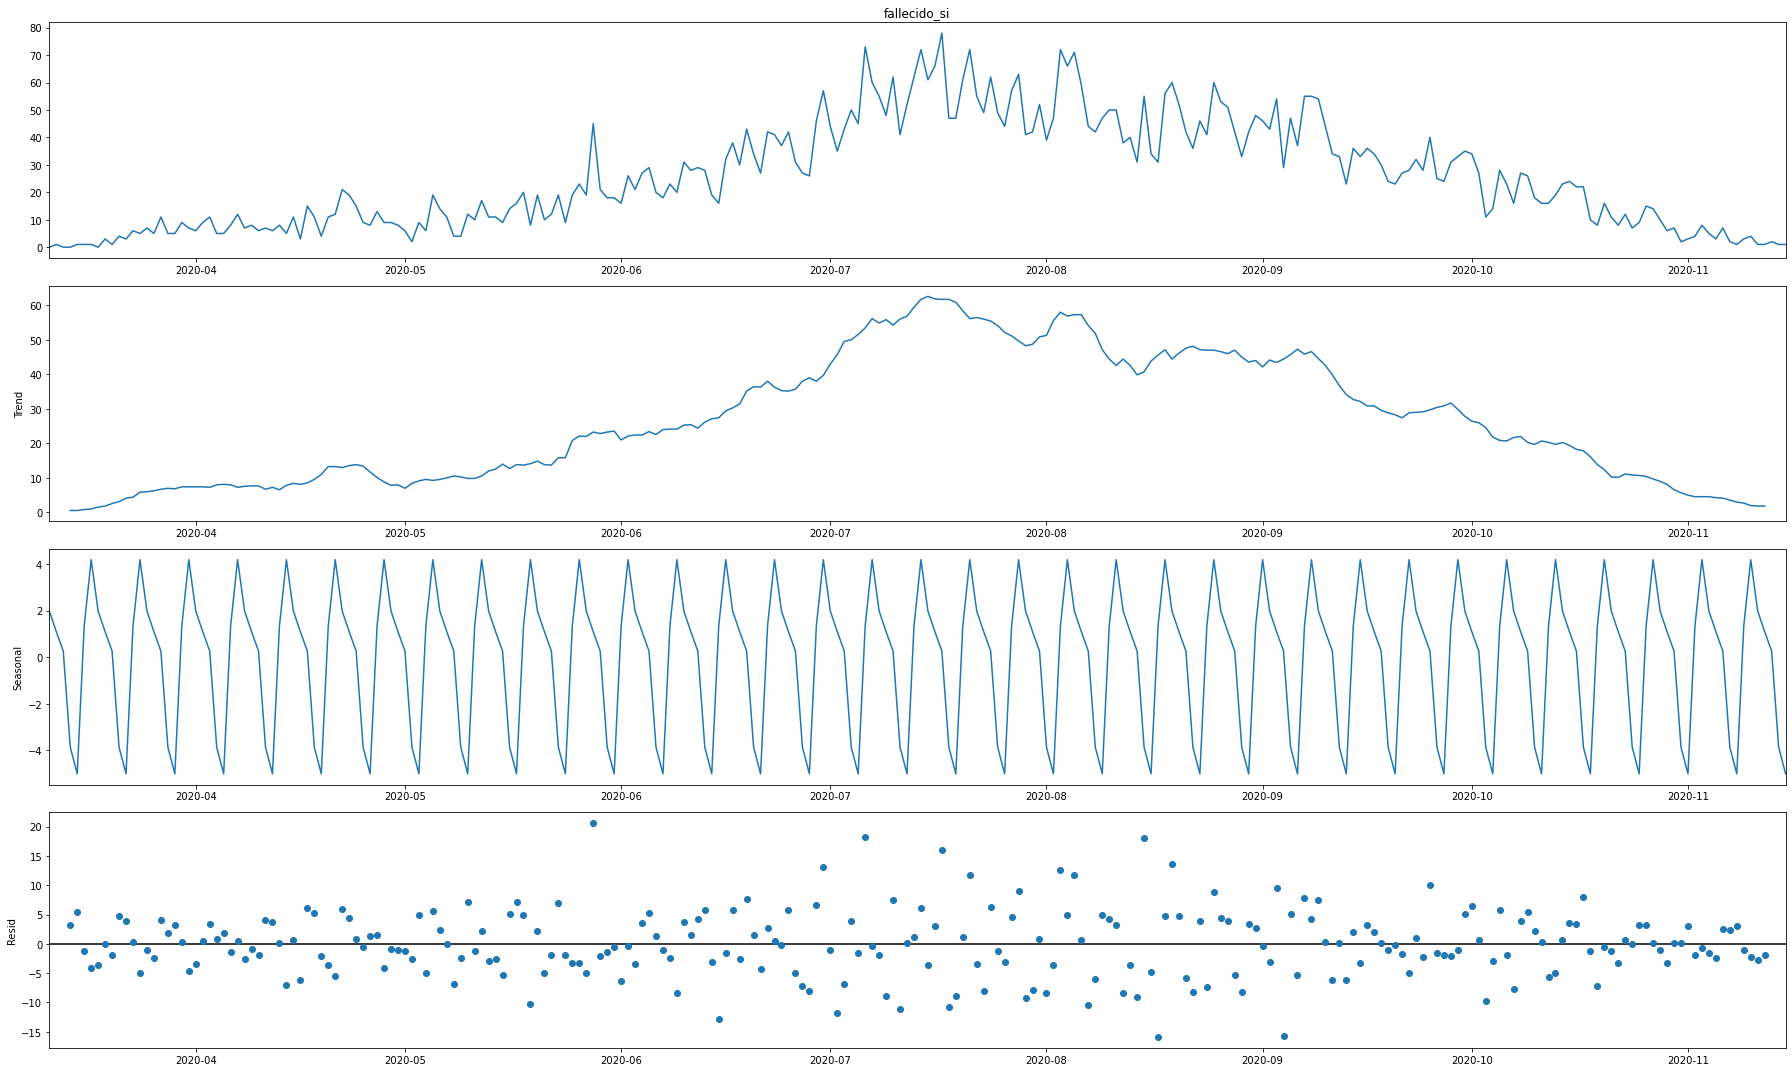

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

fallecido_si = seasonal_decompose(data_dia.fallecido_si, model='additive')
fallecido_si.trend
fallecido_si.seasonal

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [25,15]
fallecido_si.plot()
plt.show()

### Comparación de casos positivos, negativos y sospechosos

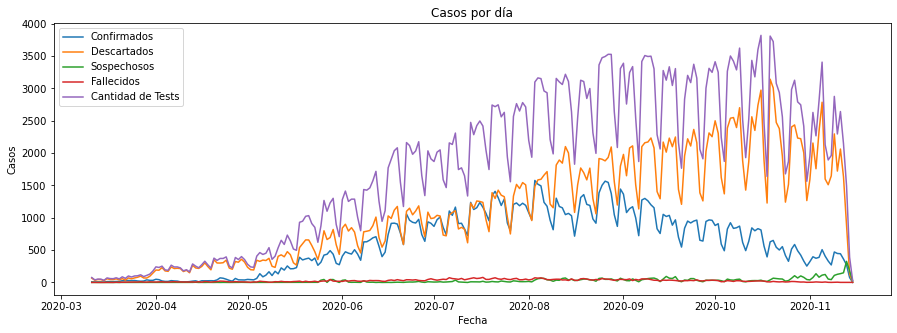

In [30]:
plt.figure(figsize = (15,5))
plt.plot(data_dia.index, data_dia.clasificacion_confirmado, label = 'Confirmados')
plt.plot(data_dia.index, data_dia.clasificacion_descartado, label = 'Descartados')
plt.plot(data_dia.index, data_dia.clasificacion_sospechoso, label = 'Sospechosos')
plt.plot(data_dia.index, data_dia.fallecido_si, label = 'Fallecidos')
plt.plot(data_dia.index, data_dia.numtests, label = 'Cantidad de Tests')
plt.legend()
plt.title('Casos por día')
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.show()

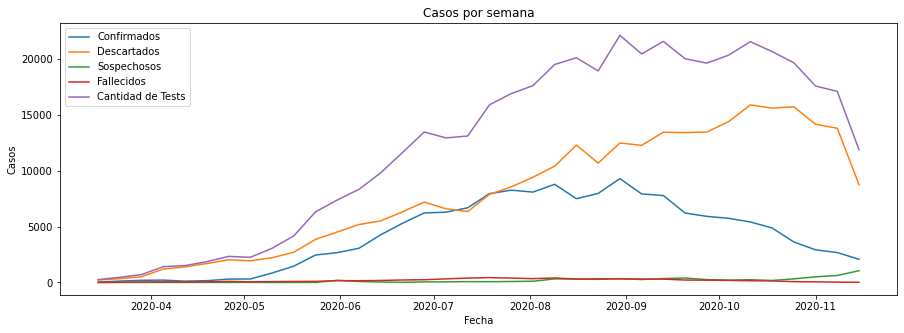

In [31]:
plt.figure(figsize = (15,5))
plt.plot(data_semana.index, data_semana.clasificacion_confirmado, label = 'Confirmados')
plt.plot(data_semana.index, data_semana.clasificacion_descartado, label = 'Descartados')
plt.plot(data_semana.index, data_semana.clasificacion_sospechoso, label = 'Sospechosos')
plt.plot(data_semana.index, data_semana.fallecido_si, label = 'Fallecidos')
plt.plot(data_semana.index, data_semana.numtests, label = 'Cantidad de Tests')
plt.legend()
plt.title('Casos por semana')
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.show()

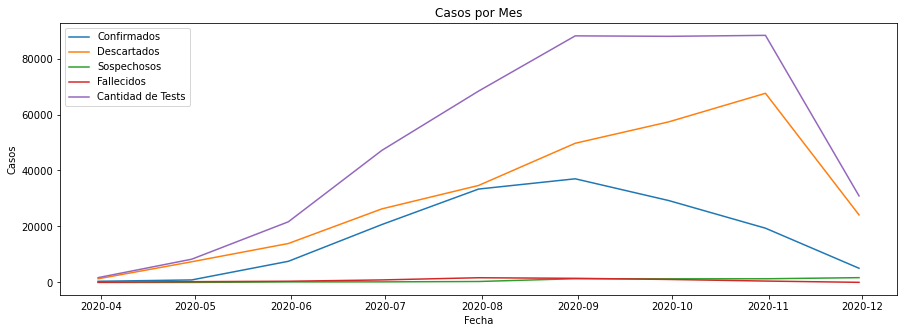

In [32]:
plt.figure(figsize = (15,5))
plt.plot(data_mes.index, data_mes.clasificacion_confirmado, label = 'Confirmados')
plt.plot(data_mes.index, data_mes.clasificacion_descartado, label = 'Descartados')
plt.plot(data_mes.index, data_mes.clasificacion_sospechoso, label = 'Sospechosos')
plt.plot(data_mes.index, data_mes.fallecido_si, label = 'Fallecidos')
plt.plot(data_mes.index, data_mes.numtests, label = 'Cantidad de Tests')
plt.legend()
plt.title('Casos por Mes')
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.show()

In [33]:
data_semana.shape[0]

36

In [34]:
from statsmodels.tsa.stattools import acf

nlags =  data_semana.shape[0]-1
autocorr = acf(data_semana.clasificacion_confirmado, nlags = nlags)

C:\Users\Mariano\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


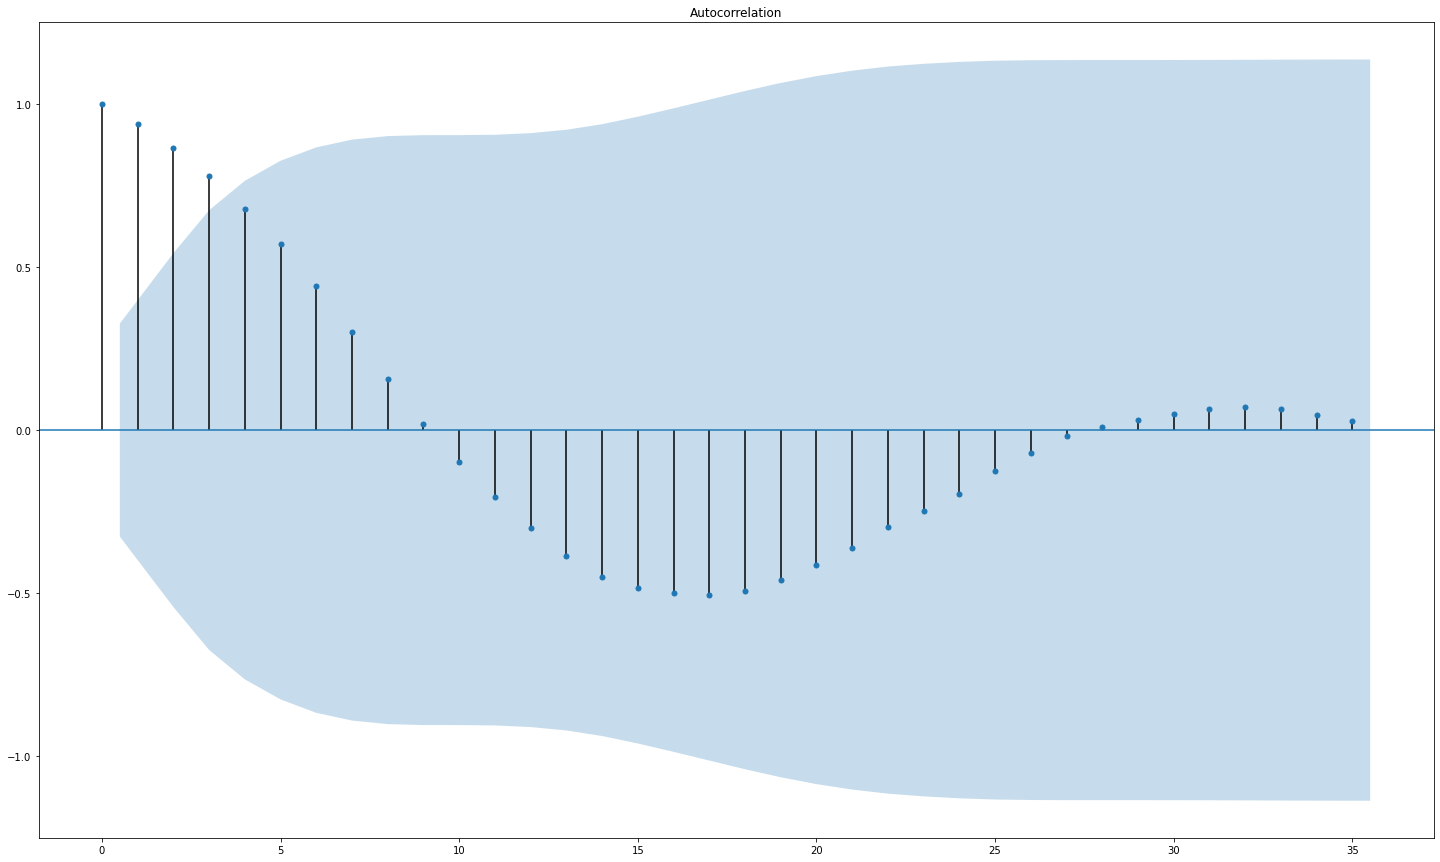

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_semana.clasificacion_confirmado, lags = nlags)
plt.show()

In [36]:
look_back= int(nlags / 8)-1
look_back

3

In [37]:
import numpy as np

N = data_semana.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(32, 3) (32,)


In [38]:
for i in range(X.shape[0]):
#     X[i,:] = senial.values.iloc[i:i+look_back]
#     y[i] = senial.values.iloc[i+look_back]
    X[i,:] = data_semana.clasificacion_confirmado.iloc[i:i+look_back]
    y[i] = data_semana.clasificacion_confirmado.iloc[i+look_back]

In [39]:
X

array([[  32.,  125.,  192.],
       [ 125.,  192.,  211.],
       [ 192.,  211.,  114.],
       [ 211.,  114.,  159.],
       [ 114.,  159.,  302.],
       [ 159.,  302.,  309.],
       [ 302.,  309.,  843.],
       [ 309.,  843., 1457.],
       [ 843., 1457., 2457.],
       [1457., 2457., 2670.],
       [2457., 2670., 3061.],
       [2670., 3061., 4267.],
       [3061., 4267., 5294.],
       [4267., 5294., 6221.],
       [5294., 6221., 6290.],
       [6221., 6290., 6684.],
       [6290., 6684., 7946.],
       [6684., 7946., 8261.],
       [7946., 8261., 8087.],
       [8261., 8087., 8784.],
       [8087., 8784., 7497.],
       [8784., 7497., 7968.],
       [7497., 7968., 9292.],
       [7968., 9292., 7924.],
       [9292., 7924., 7778.],
       [7924., 7778., 6211.],
       [7778., 6211., 5914.],
       [6211., 5914., 5742.],
       [5914., 5742., 5413.],
       [5742., 5413., 4879.],
       [5413., 4879., 3622.],
       [4879., 3622., 2922.]])

In [40]:
N_train = int(X.shape[0]*0.8) # cantidad de instancias que vamos a usar para entrenar. 
N_test = int(X.shape[0]-N_train) #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(25, 3) (25,)
(7, 3) (7,)


In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200,random_state=42, n_jobs = 4).fit(X_train,y_train)

In [42]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

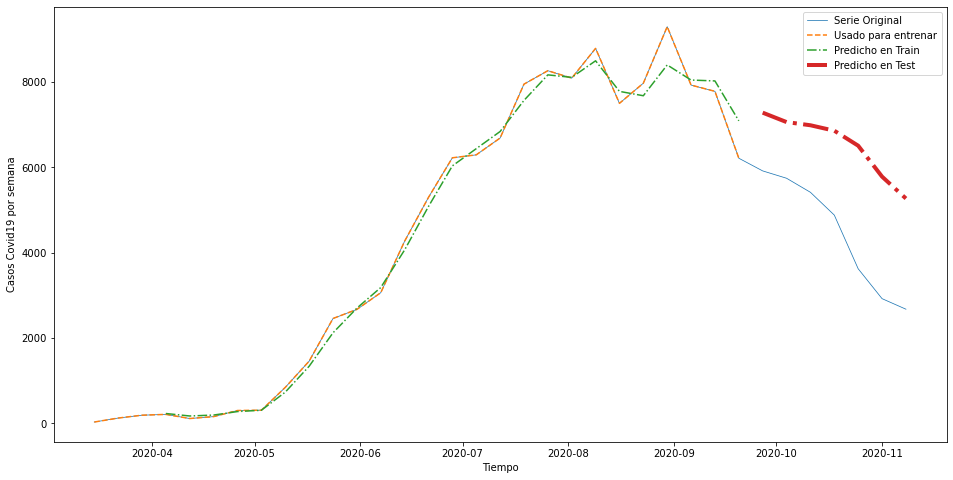

In [43]:
plt.figure(figsize=(16,8))
plt.plot(data_semana.clasificacion_confirmado.index[:length_total], data_semana.clasificacion_confirmado[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(data_semana.clasificacion_confirmado.index[:N_train + look_back], data_semana.clasificacion_confirmado[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(data_semana.clasificacion_confirmado.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(data_semana.clasificacion_confirmado.index[N_train + look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Casos Covid19 por semana')
plt.show()

In [44]:
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 308.12136041826125
Error en Test: 2176.62068211991


In [45]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

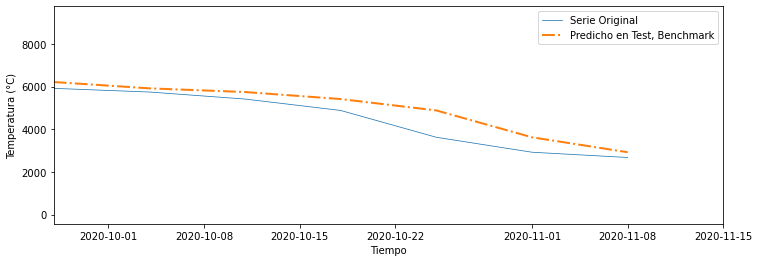

In [46]:
plt.figure(figsize=(12,4))
plt.plot(data_semana.clasificacion_confirmado.index[:length_total], data_semana.clasificacion_confirmado[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(data_semana.clasificacion_confirmado.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(data_semana.clasificacion_confirmado.index[N_train+look_back], data_semana.clasificacion_confirmado.index[length_total])
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

In [47]:
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]
MSE = mean_squared_error(y_test, y[-1 + N_train:N_train+N_test - 1])
print(np.sqrt(MSE))

614.3809892892194


3. Prophet¶
Instala y estudia las características de esta librería. Intenta utilizarla para obtener los componentes de la serie y para predecir. ¡Recuerda seguir la documentación!

In [48]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [49]:
df = data_semana

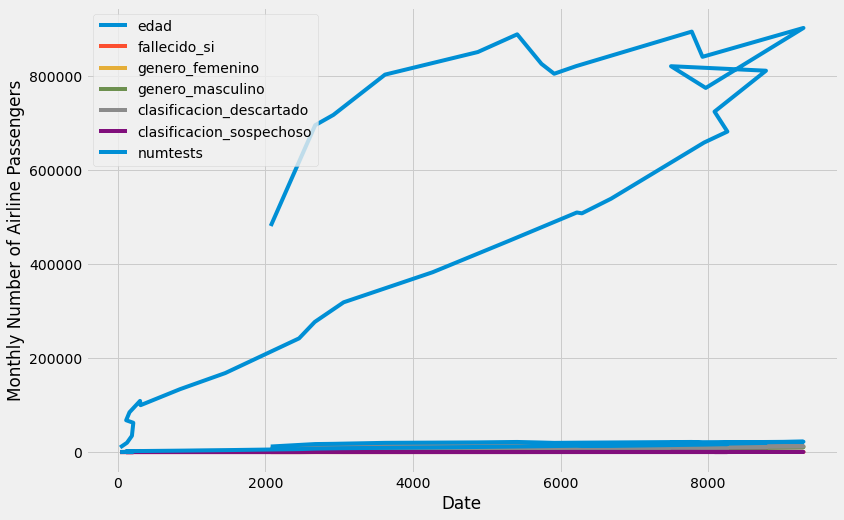

In [50]:
ax = df.set_index('clasificacion_confirmado').plot(figsize=(12, 8))
ax.set_ylabel('confirmados')
ax.set_xlabel('Date')
plt.show()

In [51]:
df = df.drop(['genero_femenino', 'genero_masculino', 'clasificacion_descartado', 'clasificacion_sospechoso', 'numtests'], axis=1)

In [52]:
from fbprophet import Prophet
df = df.rename(columns={"clasificacion_confirmado": "y", "fecha_toma_muestra": "ds"})

Importing plotly failed. Interactive plots will not work.


In [53]:
df['ds'] = df.index

In [61]:
m = Prophet(daily_seasonality=True, seasonality_prior_scale=0.1)
m.fit(df)
future = m.make_future_dataframe(periods=200)
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


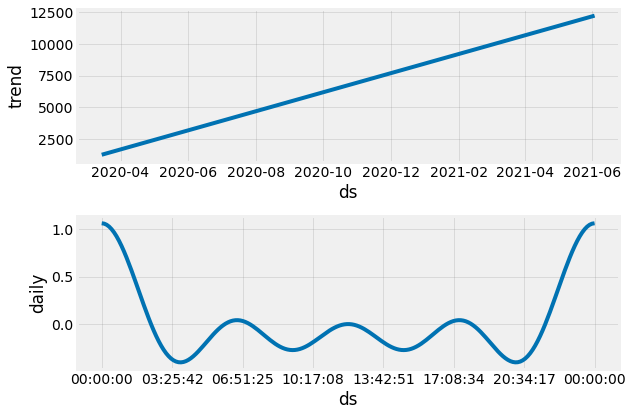

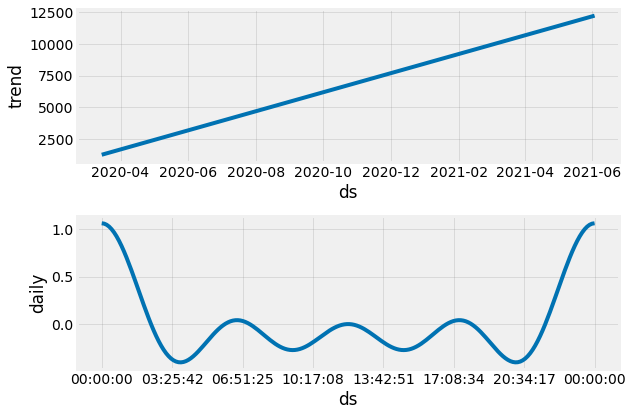

In [62]:
m.plot_components(forecast)